## EDA (Exploratory Data Analisis)
        * En este notebook se realiza un analisis de nuestros datasets para encontrar insights y posibles outliers que lleguen a afectar nuestros datos, entendiendo tendencias y resultados obtenidos
    

In [2]:
# Cargamos las librerias que utilizaremos para nuestro analisis 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import pyarrow

In [4]:
# Cargamos nustros datasets 
games= pd.read_parquet('C:/Users/hp/Desktop/HENRY/Soy henry Modulos/PI ML/PI MLOps - STEAM/Datasets/steam_games.parquet')
reviews= pd.read_parquet('C:/Users/hp/Desktop/HENRY/Soy henry Modulos/PI ML/PI MLOps - STEAM/Datasets/user_reviews.parquet')
items= pd.read_parquet('C:/Users/hp/Desktop/HENRY/Soy henry Modulos/PI ML/PI MLOps - STEAM/Datasets/users_items.parquet')

In [6]:
# revisamos que el dataframe games se haya cargado correctamente 
games

,genres,app_name,title,url,release_date,tags,reviews_url,id
0,None,None,None,None,NaT,None,None,NaN
1,None,None,None,None,NaT,None,None,NaN
2,None,None,None,None,NaT,None,None,NaN
3,None,None,None,None,NaT,None,None,NaN
4,None,None,None,None,NaT,None,None,NaN
...,...,...,...,...,...,...,...,...
120440,"['Casual', 'Indie', 'Simulation', 'Strategy']",None,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/773640/reviews/?...,773640.0
120441,"['Casual', 'Indie', 'Strategy']",None,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",http://steamcommunity.com/app/733530/reviews/?...,733530.0
120442,"['Indie', 'Racing', 'Simulation']",None,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,610660.0
120443,"['Casual', 'Indie']",None,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,658870.0


In [7]:
# revisamos que el dataframe reviews se haya cargado correctamente 
reviews

,user_id,user_url,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,True,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-07-15,22200,True,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-04-21,43110,True,2
3,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,True,2
4,js41637,http://steamcommunity.com/id/js41637,2013-09-08,227300,True,2
...,...,...,...,...,...,...
59300,Fuckfhaisjnsnsjakaka,http://steamcommunity.com/id/Fuckfhaisjnsnsjakaka,NaT,70,True,2
59301,3214213216,http://steamcommunity.com/id/3214213216,NaT,362890,True,2
59302,ChrisCoroner,http://steamcommunity.com/id/ChrisCoroner,NaT,273110,True,2
59303,CaptainAmericaCw,http://steamcommunity.com/id/CaptainAmericaCw,NaT,730,True,2


In [8]:
# revisamos que el dataframe items se haya cargado correctamente  
items

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,20,Team Fortress Classic,0.0
2,76561197970982479,30,Day of Defeat,7.0
3,76561197970982479,40,Deathmatch Classic,0.0
4,76561197970982479,50,Half-Life: Opposing Force,0.0
...,...,...,...,...
5170009,76561198329548331,346330,BrainBread 2,0.0
5170010,76561198329548331,373330,All Is Dust,0.0
5170011,76561198329548331,388490,One Way To Die: Steam Edition,3.0
5170012,76561198329548331,521570,You Have 10 Seconds 2,4.0


In [12]:
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        28852 non-null  object        
 1   app_name      0 non-null      object        
 2   title         30085 non-null  object        
 3   url           32135 non-null  object        
 4   release_date  29783 non-null  datetime64[ns]
 5   tags          31972 non-null  object        
 6   reviews_url   32133 non-null  object        
 7   id            32133 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 7.4+ MB


In [16]:
#
print(f'suma de titulos nulos', games['title'].isnull().sum())
print(f'suma de app_name nulos',games['app_name'].isnull().sum())
print(f'suma de id nulos', games['id'].isnull().sum())

suma de titulos nulos 90360
suma de app_name nulos 120445
suma de id nulos 88312


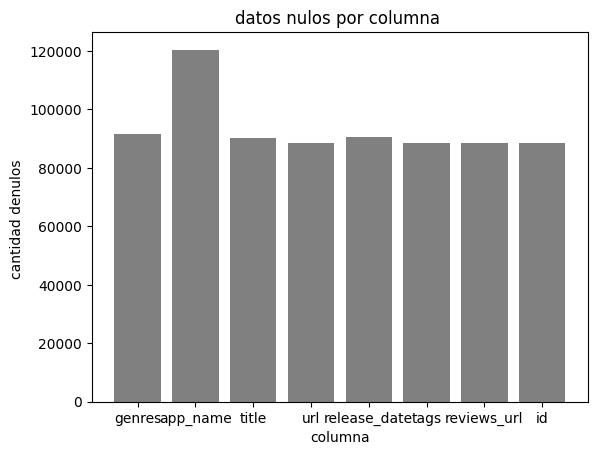

In [37]:
# Calcular la cantidad de valores nulos en cada columna
conteo_de_nulos = games.isnull().sum()

# Crear la gráfica de barras
plt.bar(conteo_de_nulos.index, conteo_de_nulos.values,color='grey')
plt.title('datos nulos por columna ')
plt.ylabel('cantidad denulos ')
plt.xlabel('columna') 
# Mostrar la gráfica
plt.show()